<h1 style="text-align: center;">Deaths in Formula&nbsp;1</h1>

<p style="text-align: center;">By KJ Chu</p>

<p><figure style="width: 50%; margin: 0 auto">
<img style="width: 100%;" src="media/senna_1994_sanmarino_wreck.jpg"/>
<figcaption style="text-align: center; ">
*Ayrton Senna’s car shortly after his fatal accident at the 1994 San Marino Grand Prix.*
</figcaption></figure></p>

## Introduction

It is no secret that motor racing is a dangerous sport. In the seven decades that the Formula&nbsp;1 World Championship has been contested, 52 drivers have paid the ultimate price in the pursuit of speed and supremacy on track. With wheel-to-wheel racing in open-cockpit cars capable of well over 200 miles per hour, nasty accidents are an inevitability. In the event of a crash, a driver can experience in excess of 50&nbsp;G of deceleration, potentially suffering fatal head, neck, and spine trauma in the process.

<p><figure style="width: 50%; margin: 0 auto">
<img style="width: 100%;" src="media/alonso_2016_australia_crash.gif"/>
<figcaption style="text-align: center;">
*Fernando Alonso’s accident at the 2016 Australian Grand Prix. Alonso was travelling at 190&nbsp;mph (305&nbsp;km/h) when he collided with another driver, losing control of his car and rolling it in the air before slamming into a wall with 45&nbsp;G of force. Alonso will walk away totally unharmed.*
</figcaption></figure></p>

Nowdays, the governing body of Formula&nbsp;1, the International Automobile Federation (FIA), takes drivers’ safety very seriously. All drivers must wear a helmet capable of surviving racing impacts, a full-body suit made of fireproof material, and a Head and Neck Support (HANS) device, as well as be strapped into their car securely with a six-point racing harness. The car chassis must survive a series of intensive and comprehensive crash tests and must be equipped with a fire extinguishing system in the event of an engine fire. Fuel tanks must be made out of bulletproof materials to eliminate any possibility of fuel leaking out. A speed limit is enforced in the pit lane, and pit stops must be made safely and under the watch of a fireman.

<p><figure style="width: 50%; margin: 0 auto">
<img style="width: 100%;" src="media/verstappen_1994_germany_fire.gif"/>
<figcaption style="text-align: center;">
*Jos Verstappen’s botched pit stop at the 1994 German Grand Prix. An error during refuelling caused gasoline to spray all over the pit box, the crew members, and the hot car, setting it ablaze. Verstappen will escape with his life and minor burns thanks to his team’s adherence to fire safety protocols as well as the quick reactions of his pit crew.*
</figcaption></figure></p>

It wasn’t always like that. In the early days of Formula&nbsp;1, racing standards were considerably laxer, and almost no consideration was given to safety. Helmets were not made mandatory until 1952, and even then they were open-face and provided marginal impact absorption. Seat belts were often foregone entirely in the facetious belief that it was better to be ejected from a crashed car then to be trapped inside it. Barriers protecting spectators and crew members from high speed accidents were only installed in the 1970s, and until the 1990s, offered little more shock absorption than hard concrete. Many racetracks featured poorly designed and unforgiving corners that unsettled cars and threw them into barriers.

<p><figure style="width: 50%; margin: 0 auto">
<img style="width: 100%;" src="media/nurburgringnordschleife_flugplatz.jpg"/>
<figcaption style="text-align: center;">
*An airborne car exiting Flugplatz, an infamous corner at the Nordschleife racetrack in Germany with a nasty habit of causing cars to jump and lose control. A spectator will be killed shortly, and the corner will be redesigned in an effort to make it safer. The Nordschleife has been affectionately nicknamed “Green Hell” for being one of the most dangerous racetracks in the world, and for precisely that reason, Formula&nbsp;1 has not raced there since the 1980s.*
</figcaption></figure></p>

Modern Formula&nbsp;1 is light years safer than it was in the past, but modern Formula&nbsp;1 remains very dangerous. After Jules Bianchi’s major accident at the 2014 Japanese Grand Prix, the FIA began implementing additional safety changes—a “virtual safety car” to better handle on-track hazards, altered the start times of races to ensure that driver visibility is not affected by the setting sun, and added a “halo” to protect the driver’s head from low obstacles. Jules Bianchi died from his injuries in July 2015, making him the latest death in Formula&nbsp;1.

<p><figure style="width: 50%; margin: 0 auto">
<img style="width: 100%;" src="media/leclerc_2018_belgium_halo.gif"/>
<figcaption style="text-align: center;">
*Charles Leclerc’s first-corner incident at the 2018 Belgian Grand Prix. The halo was a controvertial addition to the 2018 Formula&nbsp;1 season, with many condeming it as unsightly, but in December 2018 the FIA concluded that the halo had almost certainly protected Leclerc from injury, and likely saved his life.*
</figcaption></figure></p>

The rules that Formula&nbsp1 has implemented to facilitate safety can be sorted into three broad categories:

  - Reducing the speed of the cars, thereby reducing their likelihood of crashing (engine and diffuser regulations, adding chicanes to long straights, etc.);
  - Improving the design of the track (making corners more stable, installing crash barriers and tarmac runoff zones, etc.); and
  - Making the cars and drivers more capable of surviving a crash (crash helmets, crash tests, etc.);

In this notebook, I am seeking to understand Formula&nbsp;1’s deadly nature, the measures put in place to rectify that, and how effective the FIA has been at preventing fatalities. I will analyze data race by race, season by season, and decade by decade and try to define metrics to compare the relative safety of the eras of Formula&nbsp;1.

## Prep Work

### Prerequesites

A couple packages are necessary for the code in this notebook to run:

  - [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/);
  - [Matplotlib](https://matplotlib.org/index.html);
  - [NumPy](http://www.numpy.org/);
  - [Pandas](https://pandas.pydata.org/); and
  - [PandaSQL](https://github.com/yhat/pandasql)

In [1]:
import bs4
import matplotlib.pyplot
import numpy
import pandas
import pandasql
import requests

### Database Preparations

The [Ergast Motor Racing Developer API](http://ergast.com/mrd/) has collected and compiled a database of Formula&nbsp;1 information across its 69-year history, including driver statistics, championship standings, lap times, etc. The database is availabe in the form of CSV files.

In [2]:
def cleanup(dataframe):
    dataframe.replace("\\N", numpy.nan, True)
    return dataframe

circuits = cleanup(pandas.read_csv(
    "f1db/circuits.csv",
    names = [
        "circuitId",
        "circuitRef",
        "name",
        "location",
        "country",
        "lat",
        "lng",
        "alt",
        "url",
    ]
))
constructorResults = cleanup(pandas.read_csv(
    "f1db/constructor_results.csv",
    names = [
        "constructorResultsId",
        "raceId",
        "constructorId",
        "points",
        "status",
    ]
))
constructorStandings = cleanup(pandas.read_csv(
    "f1db/constructor_standings.csv",
    names = [
        "constructorStandingsId",
        "raceId",
        "constructorId",
        "points",
        "position",
        "positionText",
        "wins",
    ]
))
constructors = cleanup(pandas.read_csv(
    "f1db/constructors.csv",
    names = [
        "constructorId",
        "constructorRef",
        "name",
        "nationality",
        "url",
    ]
))
driverStandings = cleanup(pandas.read_csv(
    "f1db/driver_standings.csv",
    names = [
        "driverStandingsId",
        "raceId",
        "driverId",
        "points",
        "position",
        "positionText",
        "wins",
    ]
))
drivers = cleanup(pandas.read_csv(
    "f1db/driver.csv",
    names = [
        "driverId",
        "driverRef",
        "number",
        "code",
        "forename",
        "surname",
        "dob",
        "nationality",
        "url",
    ]
))
lapTimes = cleanup(pandas.read_csv(
    "f1db/lap_times.csv",
    names = [
        "raceId",
        "driverId",
        "lap",
        "position",
        "time",
        "milliseconds",
    ]
))
pitStops = cleanup(pandas.read_csv(
    "f1db/pit_stops.csv",
    names = [
        "raceId",
        "driverId",
        "stop",
        "lap",
        "time",
        "duration",
        "milliseconds",
    ]
))
qualifying = cleanup(pandas.read_csv(
    "f1db/qualifying.csv",
    names = [
        "qualifyId",
        "raceId",
        "driverId",
        "constructorId",
        "number",
        "position",
        "q1",
        "q2",
        "q3",
    ]
))
races = cleanup(pandas.read_csv(
    "f1db/races.csv",
    names = [
        "raceId",
        "year",
        "round",
        "circuitId",
        "name",
        "date",
        "time",
        "url",
    ]
))
results = cleanup(pandas.read_csv(
    "f1db/results.csv",
    names = [
        "resultId",
        "raceId",
        "driverId",
        "constructorId",
        "number",
        "grid",
        "position",
        "positionText",
        "positionOrder",
        "points",
        "laps",
        "time",
        "milliseconds",
        "fastestLap",
        "rank",
        "fastestLapTime",
        "fastestLapSpeed",
        "statusId",
    ]
))
seasons = cleanup(pandas.read_csv(
    "f1db/seasons.csv",
    names = [
        "year",
        "url",
    ]
))
status = cleanup(pandas.read_csv(
    "f1db/status.csv",
    names = [
        "statusId",
        "status",
    ]
))

However, the Ergast Databse does not record fatalities. This data was found on a [list of Formula&nbsp;1 fatalities](https://en.wikipedia.org/wiki/List_of_Formula_One_fatalities) compiled by Wikipedia.

In [3]:
request = requests.get("https://en.wikipedia.org/wiki/List_of_Formula_One_fatalities")
response = request.content
request.close()

documentHtml = bs4.BeautifulSoup(response, "html.parser")

tableHtml = documentHtml.find_all("table", class_="wikitable")[1]

COUNT_COLUMNS = 7

data = []

cellsHtmlSpanning = {}

for rowHtml in tableHtml.find_all("tr"):
    row = []
    
    indexCellHtml = 0
    indexCellHtmlTrue = 0
    
    cellsHtml = []
    
    for cellHtml in rowHtml.find_all(["td", "th"]):
        cellsHtml.append(cellHtml)
        
    while indexCellHtmlTrue < COUNT_COLUMNS:
        if indexCellHtmlTrue in cellsHtmlSpanning:
            cellHtml, spanCellHtml = cellsHtmlSpanning[indexCellHtmlTrue]
            
            cellsHtmlSpanning[indexCellHtmlTrue] = (cellHtml, spanCellHtml - 1)
            
            if cellsHtmlSpanning[indexCellHtmlTrue][1] == 0:
                del cellsHtmlSpanning[indexCellHtmlTrue]
        else:
            cellHtml = cellsHtml[indexCellHtml]
            indexCellHtml += 1

            span = int(cellHtml["rowspan"]) - 1 if cellHtml.has_attr("rowspan") else 0

            if span > 0:
                cellsHtmlSpanning[indexCellHtmlTrue] = (cellHtml, span)

        anchorsCellHtml = cellHtml.find_all("a")

        if len(anchorsCellHtml) == 0:
            row.append(cellHtml.decode_contents().strip())
            row.append(numpy.nan)
        else:
            anchorCellHtml = anchorsCellHtml[0]
            row.append(anchorCellHtml.decode_contents().strip())
            row.append("http://en.wikipedia.org" + anchorCellHtml["href"])
            
        indexCellHtmlTrue += 1
    
    data.append(row)
    
fatalities = pandas.DataFrame(data[1:], columns = data[0])

fatalities.columns = [
    "nameDriver",
    "urlDriver",
    "dateAccident",
    0,
    "nameEvent",
    "urlEvent",
    "nameCircuit",
    "urlCircuit",
    "nameCar",
    "urlCar",
    "session",
    1,
    2,
    3
]

fatalities.drop(columns = [0, 1, 2, 3], inplace = True)

An “accident” is defined as any driver result in the database matching an accident, a collision, an injury, or something else along those lines.

<p><figure style="width: 50%; margin: 0 auto">
<img style="width: 100%;" src="media/raikkonen_2018_bahrain_pitstop.gif"/>
<figcaption style="text-align: center;">
*Kimi Raikkonen’s pit stop incident at the 2018 Bahrain Grand Prix. An unsafe released resulted in Raikkonen running over a mechanic, breaking his leg. While this incident is clearly an “injury” and the clearly the result of unsafe actions, this notebook only concerns itself with driver injuries.*
</figcaption></figure></p>

In [18]:
resultsAccidents = pandasql.sqldf("""
    SELECT *
    FROM
        results JOIN
        status ON results.statusId = status.statusId
    WHERE
        status = 'Accident' OR
        status = 'Collision' OR
        status = 'Injured' OR
        status = 'Injury' OR
        status = 'Fatal accident' OR
        status = 'Eye injury' OR
        status = 'Collision damage'
""", globals())

## Accidents in the Paddock

Accidents happen all the time in Formula&nbsp;1. The following is a graph showing the number of incidents per year; however, since the number of races per year is variable—the 1950 season only had 7 races, while the 2018 season had 21—the number of incidents is adjusted for the number of races per sesason by dividing the number of incidents in a season by the number of races in that season.

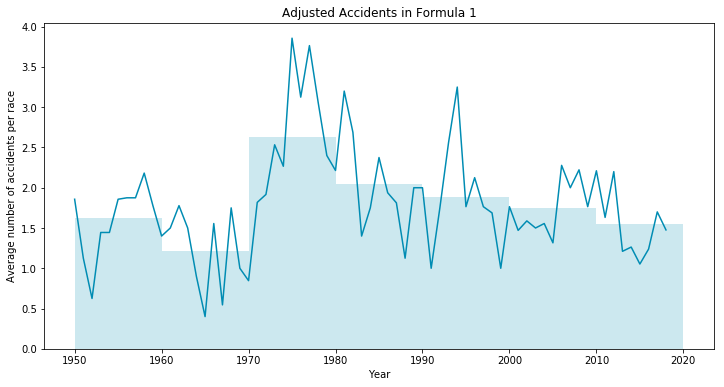

In [22]:
color = (0, 0.55, 0.7)

figure = matplotlib.pyplot.figure(None, (12, 6))

plot = figure.subplots()    
plot.set_title("Adjusted Accidents in Formula 1")
plot.set_xlabel("Year")
plot.set_ylabel("Average number of accidents per race")

dataChart = pandasql.sqldf("""
    WITH
        racesAnnual AS (
            SELECT year, COUNT(*) countRaces
            FROM races
            GROUP BY year
        ),
        accidentsAnnual AS (
            SELECT year, COUNT(*) countAccidents
            FROM
                resultsAccidents JOIN
                races ON resultsAccidents.raceId = races.raceId
            GROUP BY year
        )
    SELECT
        racesAnnual.year,
        countRaces,
        IFNULL(countAccidents, 0) countAccidents,
        (IFNULL(countAccidents, 0) * 1.0) / countRaces accidentsPerRace
    FROM
        racesAnnual LEFT JOIN
        accidentsAnnual ON racesAnnual.year = accidentsAnnual.year
""", globals())

dataHistogram = pandasql.sqldf("""
    SELECT
        year / 10 * 10 decade,
        (SUM(countAccidents) * 1.0) / SUM(countRaces) accidentsPerRace
    FROM dataChart
    GROUP BY year / 10 * 10
""", globals())

valuesChart = {}
valuesHistogram = {}

for index, row in dataChart.iterrows():
    valuesChart[row["year"]] = row["accidentsPerRace"]

for index, row in dataHistogram.iterrows():
    valuesHistogram[row["decade"]] = row["accidentsPerRace"]
    
plot.plot(list(valuesChart.keys()), list(valuesChart.values()), color = color)

plot.hist(
    list(valuesHistogram.keys()),
    [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
    weights = list(valuesHistogram.values()),
    color = (color[0], color[1], color[2], 0.2)
)

pass

From the data, we can see a two pretty clear jumps in accidents: the first in the mid-1970s, and the second around 1994.

The mid-1970s are known in Formula&nbsp;1 history for heralding the advent of [ground effect](https://us.motorsport.com/f1/news/retro-f1-tech-the-ground-effect-era-873918/3014985/) Ground effect is an aerodymanic effect that allows a vehicle to generate lift (or in the case of racing cars, aerodynamic downforce), in effect using moving air to “suck” a car into the ground with very little increase in drag or weight. This allows a designer to create a car that utilizes ground effect to generate large amounts of downforce, pressing the car into the pavement harder and increasing the grip a car has, allowing the car to lap significantly faster. Likely, the first sudden increase in speed across the field resulted in the first observed jump in accidents.

The second jump (1994) can be correlated with a major technical rule change in Formula&nbsp;1. Prior to the 1994 season, the cars were built with “driver aids”: [traction control](https://en.wikipedia.org/wiki/Traction_control_system) (reducing burnouts during acceleration), [anti-lock brakes](https://en.wikipedia.org/wiki/Anti-lock_braking_system) (preventing the brakes from locking up under heavy braking), and [launch control](https://en.wikipedia.org/wiki/Launch_control_(automotive)) (helping a driver maximize acceleration off the line at the start of a race), among others. During the 1994 season, all of these driver aids were banned, requiring the driver to prevent burnouts and lock-ups using their own skill as a driver. The sudden banning of assistance features that drivers had become dependent on likely caused the second observed jump in accidents.

The following graph plots a similarly season-adjusted number of racing fatalities:

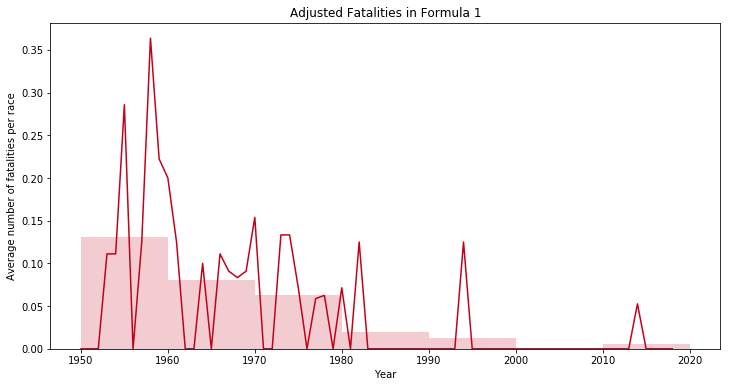

In [23]:
color = (0.76, 0, 0.1)

figure = matplotlib.pyplot.figure(None, (12, 6))

plot = figure.subplots()    
plot.set_title("Adjusted Fatalities in Formula 1")
plot.set_xlabel("Year")
plot.set_ylabel("Average number of fatalities per race")

dataChart = pandasql.sqldf("""
    WITH
        racesAnnual AS (
            SELECT year, COUNT(*) countRaces
            FROM races
            GROUP BY year
        ),
        fatalitiesAnnual AS (
            SELECT year, COUNT(*) countFatalities
            FROM
                fatalities JOIN
                races ON fatalities.urlEvent = races.url
            GROUP BY year
        )
    SELECT
        racesAnnual.year,
        countRaces,
        IFNULL(countFatalities, 0) countFatalities,
        (IFNULL(countFatalities, 0) * 1.0) / countRaces fatalitiesPerRace
    FROM
        racesAnnual LEFT JOIN
        fatalitiesAnnual ON racesAnnual.year = fatalitiesAnnual.year
""", globals())

dataHistogram = pandasql.sqldf("""
    SELECT
        year / 10 * 10 decade,
        (SUM(countFatalities) * 1.0) / SUM(countRaces) fatalitiesPerRace
    FROM dataChart
    GROUP BY year / 10 * 10
""", globals())

valuesChart = {}
valuesHistogram = {}

for index, row in dataChart.iterrows():
    valuesChart[row["year"]] = row["fatalitiesPerRace"]

for index, row in dataHistogram.iterrows():
    valuesHistogram[row["decade"]] = row["fatalitiesPerRace"]
    
plot.plot(list(valuesChart.keys()), list(valuesChart.values()), color = color)

plot.hist(
    list(valuesHistogram.keys()),
    [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
    weights = list(valuesHistogram.values()),
    color = (color[0], color[1], color[2], 0.2)
)

pass

Here, a clear downward trend appears. The 1950s saw little to no concern for safety given at all, and as awareness improved and safety measures became more sophisticated, that rate steadily decreased. It’s incredibly gruesome to think about; in 1958, there was a 36% chance of a driver dying at *every* race. Clearly visible are the results of large safety pushes after 1982 (the death of Gilles Villeneuve and Riccardo Paletti) and 1994 (Ronald Ratzenberger and Ayrton Senna), with large timespans of zero deaths.

The following graph plots the number of fatalities per accident:

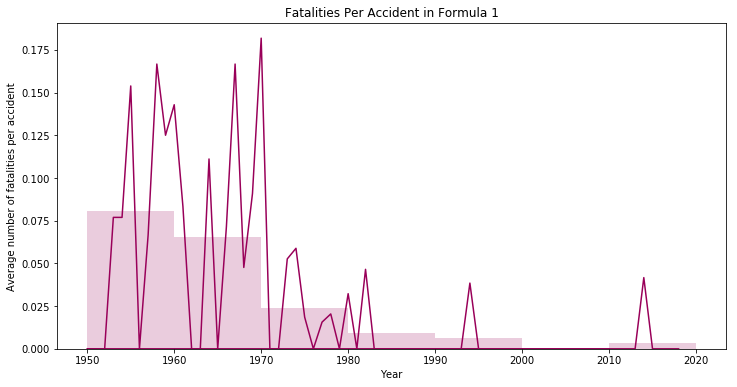

In [26]:
color = (0.6, 0, 0.35)

figure = matplotlib.pyplot.figure(None, (12, 6))

plot = figure.subplots()    
plot.set_title("Fatalities Per Accident in Formula 1")
plot.set_xlabel("Year")
plot.set_ylabel("Average number of fatalities per accident")

dataChart = pandasql.sqldf("""
    WITH
        accidentsAnnual AS (
            SELECT year, COUNT(*) countAccidents
            FROM
                resultsAccidents JOIN
                races ON resultsAccidents.raceId = races.raceId
            GROUP BY year
        ),
        fatalitiesAnnual AS (
            SELECT year, COUNT(*) countFatalities
            FROM
                fatalities JOIN
                races ON fatalities.urlEvent = races.url
            GROUP BY year
        )
    SELECT
        seasons.year,
        IFNULL(countFatalities, 0) countFatalities,
        IFNULL(countAccidents, 0) countAccidents,
        (IFNULL(countFatalities, 0) * 1.0) / IFNULL(countAccidents, 0) fatalitiesPerInjury
    FROM
        seasons LEFT JOIN
        accidentsAnnual ON seasons.year = accidentsAnnual.year LEFT JOIN
        fatalitiesAnnual ON seasons.year = fatalitiesAnnual.year        
""", globals())

dataHistogram = pandasql.sqldf("""
    SELECT
        year / 10 * 10 decade,
        (SUM(countFatalities) * 1.0) / SUM(countAccidents) fatalitiesPerInjury
    FROM dataChart
    GROUP BY year / 10 * 10       
""", globals())

valuesChart = {}
valuesHistogram = {}

for index, row in dataChart.iterrows():
    valuesChart[row["year"]] = row["fatalitiesPerInjury"]

for index, row in dataHistogram.iterrows():
    valuesHistogram[row["decade"]] = row["fatalitiesPerInjury"]
    
plot.plot(list(valuesChart.keys()), list(valuesChart.values()), color = color)

plot.hist(
    list(valuesHistogram.keys()),
    [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
    weights = list(valuesHistogram.values()),
    color = (color[0], color[1], color[2], 0.2)
)

pass

The 1970s are remembered as some of the most dangerous years among Formula&nbsp;1 fans, but the data shows that the 1970s were fairly safe, especially when compared to the 1950s and 1960s.

The following is a plot of accidents versus fatalities:

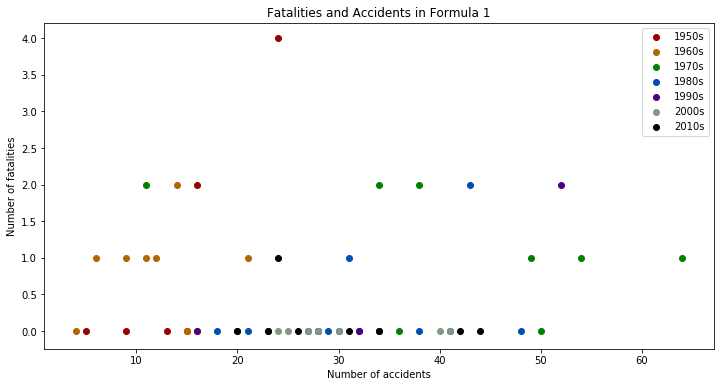

In [148]:
colors = {
    1950: (0.6, 0, 0),
    1960: (0.7, 0.4, 0),
    1970: (0, 0.5, 0),
    1980: (0, 0.3, 0.7),
    1990: (0.3, 0, 0.5),
    2000: (0.5, 0.6, 0.5),
    2010: (0, 0, 0)
}

figure = matplotlib.pyplot.figure(None, (12, 6))

plot = figure.subplots()    
plot.set_title("Fatalities and Accidents in Formula 1")
plot.set_xlabel("Number of accidents")
plot.set_ylabel("Number of fatalities")

data = pandasql.sqldf("""
    WITH
        accidentsAnnual AS (
            SELECT year, COUNT(*) countAccidents
            FROM
                resultsAccidents JOIN
                races ON resultsAccidents.raceId = races.raceId
            GROUP BY year
        ),
        fatalitiesAnnual AS (
            SELECT year, COUNT(*) countFatalities
            FROM
                fatalities JOIN
                races ON fatalities.urlEvent = races.url
            GROUP BY year
        )
    SELECT
        seasons.year / 10 * 10 decade,
        IFNULL(countFatalities, 0) countFatalities,
        IFNULL(countAccidents, 0) countAccidents
    FROM
        seasons LEFT JOIN
        accidentsAnnual ON seasons.year = accidentsAnnual.year LEFT JOIN
        fatalitiesAnnual ON seasons.year = fatalitiesAnnual.year        
""", globals())

values = {}

for index, row in data.iterrows():
    if row["decade"] not in values:
        values[row["decade"]] = {}
    
    values[row["decade"]][row["countAccidents"]] = row["countFatalities"]
    
decades = list(values.keys())
decades.sort()

for decade in decades:
    valuesDecade = values[decade]
    
    plot.scatter(list(valuesDecade.keys()), list(valuesDecade.values()), label = str(int(decade)) + "s", color = colors[decade])

plot.legend(loc = "upper right")

pass

Clearly, it is difficult to establish any clear overarching correlation between the number of accidents in a season and the number of fatalities. While it is possible to say something like “the 1950s had more fatalities per accident than the 2000s,” it is not exactly possible to derive a decade-by-decade formula for that relation—the data is far too noisy for that.

The conclusion to make here is that there is no fundamental relation between the number of accidents and the number of fatalities. In fact, eras with a significant spike in the number of accidents do not share an increase in fatalities. Rules implemented by to reduce accidents do not seem to be as effective as the FIA claims them to be.

## Lap Times

Every year since 1955, the Monaco Grand Prix has been contested in Monte Carlo, Monaco. The track, the *Circuit de Monaco*, is special since its layout has changed relatively little in the last 60 years. Different tracks and different layouts emphasize different aspects of a car’s performance; measuring cars relative to a single baseline is very useful to get an accurate read on the true performance of a car.

The following is graph plotting the average speeds of every car per season at the *Circuit de Monaco*:

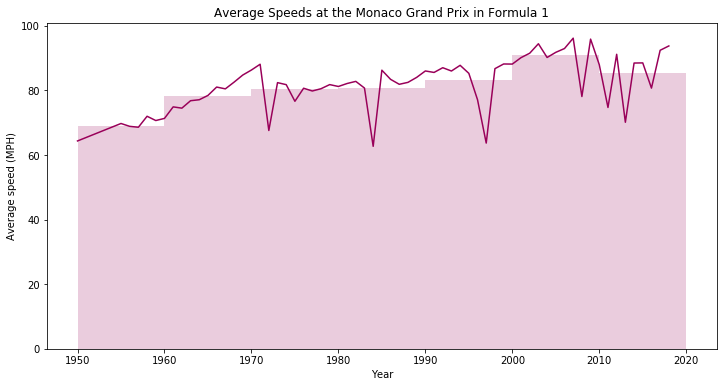

In [184]:
color = (0.6, 0, 0.35)

figure = matplotlib.pyplot.figure(None, (12, 6))

plot = figure.subplots()    
plot.set_title("Average Speeds at the Monaco Grand Prix in Formula 1")
plot.set_xlabel("Year")
plot.set_ylabel("Average speed (MPH)")

dataChart = pandasql.sqldf("""
    SELECT year, AVG((3337 / ((milliseconds * 1.0) / 1000 / laps)) * 2.23694) speed
    FROM
        results JOIN
        races ON results.raceId = races.raceId
    WHERE circuitId = 6 -- Circuit de Monaco
    GROUP BY year
""", globals())

dataHistogram = pandasql.sqldf("""
    SELECT year / 10 * 10 decade, AVG(speed) speed
    FROM dataChart
    GROUP BY year / 10 * 10
""", globals())

valuesChart = {}
valuesHistogram = {}

for index, row in dataChart.iterrows():
    valuesChart[row["year"]] = row["speed"]

for index, row in dataHistogram.iterrows():
    valuesHistogram[row["decade"]] = row["speed"]
    
plot.plot(list(valuesChart.keys()), list(valuesChart.values()), color = color)

plot.hist(
    list(valuesHistogram.keys()),
    [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
    weights = list(valuesHistogram.values()),
    color = (color[0], color[1], color[2], 0.2)
)

pass

The method used above to derive average speed is not idea: the total running time of each car was divided by the number of laps the car ran, and then these values were averaged for every season. Each year, the race is different—sometimes races get interrupted by periods of safety cars, which accounts for the sudden spikes in this clear downwards sawtooth trend. However, better methods, like qualifying laps or fastest laps, are unacceptable because records for those values have only recently been kept. Thus, this roundabout method that cannot isolate racing speeds from safety speeds is the only viable option.

The following graph plots the number of fatalities in a season per MPH the cars were capable of:

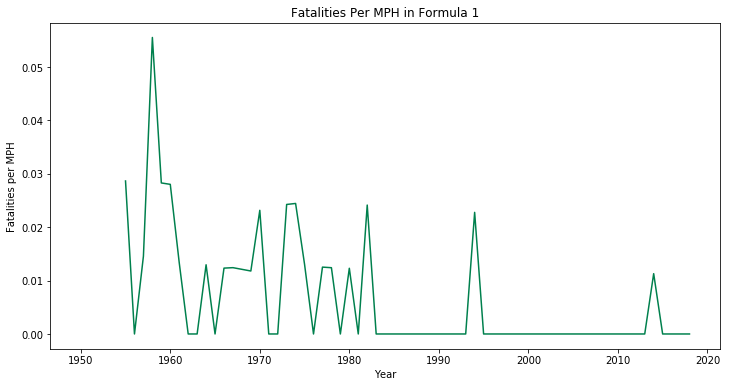

In [183]:
color = (0, 0.5, 0.3)

figure = matplotlib.pyplot.figure(None, (12, 6))

plot = figure.subplots()
plot.set_title("Fatalities Per MPH in Formula 1")
plot.set_xlabel("Year")
plot.set_ylabel("Fatalities per MPH")

data = pandasql.sqldf("""
    WITH
        speedsAnnual AS (
            SELECT year, AVG((3337 / ((milliseconds * 1.0) / 1000 / laps)) * 2.23694) speed
            FROM
                results JOIN
                races ON results.raceId = races.raceId
            WHERE circuitId = 6 -- Circuit de Monaco
            GROUP BY year
        ),
        fatalitiesAnnual AS (
            SELECT year, COUNT(*) countFatalities
            FROM
                fatalities JOIN
                races ON fatalities.urlEvent = races.url
            GROUP BY year
        )
    SELECT
        seasons.year,
        (IFNULL(countFatalities, 0) * 1.0) / speed fatalitiesPerMph
    FROM
        seasons LEFT JOIN
        speedsAnnual ON seasons.year = speedsAnnual.year LEFT JOIN
        fatalitiesAnnual ON seasons.year = fatalitiesAnnual.year 
    ORDER BY seasons.year ASC
""")

values = {}

for index, row in data.iterrows():
    values[row["year"]] = row["fatalitiesPerMph"]
    
plot.plot(list(values.keys()), list(values.values()), color = color)

pass

From the data here, there doesn’t seem to be any strong correlation between fatalities and vehicle speed. The spikes correlate with “slow” races, which are themselves caused by long periods of safety cars, themselves brought out by major racing incidents. In fact, the 1950s, which was the slowest decade in Formula&nbsp;1, was the most dangerous.

## Conclusion

In this notebook, I was unable to find any strong correlation between the rate of track accidents or the top speed of the cars and the probability of fatalities in Formula&nbsp;1. Racing is significantly safer in recent times than in the 1950s, but this is unlikely to be the result of rules limiting the performance of the cars. The conclusion to make here is that this observed safety is the cause of improved track layouts and improved crash safety technology, and not so much because of the addition of chicanes braking up long straights or engine regulations limiting the maximum power output.

Of course, there are other reasons for these regulations. Engine regulations also serve as a catch-up mechanism, preventing a dominant and well-funded team from pulling too far ahead. However, rules implemented that slow down racing and advertised as safety improvements are potentially damaging to the sport.